In [58]:
#%pip install pyreadstat

In [59]:
%pip install seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import pyreadstat
import pandas as pd

data_hogar, metadata_hogar = pyreadstat.read_sav("ENCOVI_Hogar.sav")
df_H = pd.DataFrame(data_hogar)

print(df_H.head())


   REGION  DEPTO  AREA  UPM  NUMHOG  FACTOR  FACTOR3  POBREZA  THOGAR  PPB01  \
0     1.0    1.0   1.0  1.0     1.0   525.0   1575.0      3.0     3.0    2.0   
1     1.0    1.0   1.0  1.0     2.0   525.0   1575.0      3.0     3.0    2.0   
2     1.0    1.0   1.0  1.0     3.0   525.0   9450.0      2.0    18.0    2.0   
3     1.0    1.0   1.0  1.0     4.0   525.0   3150.0      2.0     6.0    2.0   
4     1.0    1.0   1.0  1.0     5.0   525.0   1575.0      3.0     3.0    2.0   

   ...  P01H10  P01H11  P01H12  P01H13  P01H14  P01H15  P01H16  DIA_ENC  \
0  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     22.0   
1  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     27.0   
2  ...     1.0     1.0     1.0     1.0     1.0     1.0     1.0     22.0   
3  ...     2.0     2.0     2.0     2.0     2.0     2.0     2.0     24.0   
4  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN     22.0   

   MES_ENC   A_ENC  
0      8.0  2014.0  
1      8.0  2014.0  
2    

In [61]:
data_personas, metadata_personas = pyreadstat.read_sav("ENCOVI_Personas.sav")
df_P = pd.DataFrame(data_personas)
print(df_P.head())

   REGION  DEPTO  AREA  UPM  NUMHOG  FACTOR  POBREZA  THOGAR   ID  PPA02  ...  \
0     1.0    1.0   1.0  1.0     1.0   525.0      3.0     3.0  1.0    1.0  ...   
1     1.0    1.0   1.0  1.0     1.0   525.0      3.0     3.0  2.0    2.0  ...   
2     1.0    1.0   1.0  1.0     1.0   525.0      3.0     3.0  3.0    2.0  ...   
3     1.0    1.0   1.0  1.0     2.0   525.0      3.0     3.0  1.0    2.0  ...   
4     1.0    1.0   1.0  1.0     2.0   525.0      3.0     3.0  2.0    1.0  ...   

   P11A10A  P11A10B  P11B01A  P11B01B  P11B02A  P11B02B  P11B03A  P11B03B  \
0      2.0      NaN      2.0      NaN      2.0      NaN      2.0      NaN   
1      2.0      NaN      2.0      NaN      2.0      NaN      2.0      NaN   
2      2.0      NaN      2.0      NaN      2.0      NaN      2.0      NaN   
3      2.0      NaN      2.0      NaN      2.0      NaN      2.0      NaN   
4      2.0      NaN      2.0      NaN      2.0      NaN      2.0      NaN   

   P11B04A  P11B04B  
0      2.0      NaN  
1     

## Limpieza de datos
Vamos primero a observar si hay datos faltantes en los datasets y haremos uso del diccionario adjunto al mismo para saber y poder determinar cuales son las variables que utilizaremos para analizar y entrenar nuestro modelo.Luego de este proceso obtuvimos lo siguiente <br>
#### Variables para dataset Hogar
* Pobreza
* Region
* Departamento
* Area
* Thogar
* PPB01 - PPB04
* PPA11A
* PPA11B
* P01A01 - P01A04
* P01A05A
* P01A05C
* P01A06
* P01D01
* P01D03
* P01D07
* P01D08
* P01D18
* MES_ENC
* A_ENC
#### Variables para dataset Personas
* Pobreza
* Region
* Departamento
* Area
* Thogar
* PPA02
* PPA03
* PPA06

In [62]:
columnas_deseadas_df_H = ['POBREZA', 'REGION', 'DEPTO', 'AREA', 'THOGAR', 'PPB01', 'PPB02', 'PPB04', 'PPA11A', 'P01A01', 'P01A02', 'P01A03', 'P01A04', 'P01A05A', 'P01A05C', 'P01A06', 'P01D03', 'P01D08', 'MES_ENC', 'A_ENC']
df_H = df_H[columnas_deseadas_df_H]

columnas_deseadas_df_P = ['POBREZA', 'REGION', 'DEPTO', 'AREA', 'THOGAR', 'PPA02', 'PPA03', 'PPA06']
df_P = df_P[columnas_deseadas_df_P]

In [63]:
# Renombrar las columnas en DataFrame df_H
nombres_columnas_df_H = {
    'Pobreza': 'POBREZA',
    'Region': 'REGION',
    'Departamento': 'DEPTO',
    'Area': 'AREA',
    'Thogar': 'THOGAR',
    'PPB01': 'COCINAN',
    'PPB02': 'CANT_HOGARES',
    'PPB04': 'CANT_HABITANTES',
    'PPA11A': 'VIVE_EN_OTRO_PAIS',
    'P01A01': 'TIPO_HOGAR',
    'P01A02': 'MATERIAL_PARED',
    'P01A03': 'MATERIAL_TECHO',
    'P01A04': 'MATERIAL_PISO',
    'P01A05A': 'RED_AGUA',
    'P01A05C': 'RED_ELECTRICA',
    'P01A06': 'HABITACIONES',
    'P01D03': 'NEGOCIOS',
    'P01D08': 'TIPO_SERVICIO_AGUA',
    'MES_ENC': 'MES_ENC',
    'A_ENC': 'A_ENC'
}

df_H = df_H.rename(columns=nombres_columnas_df_H)

# Renombrar las columnas en DataFrame df_P
nombres_columnas_df_P = {
    'Pobreza': 'POBREZA',
    'Region': 'REGION',
    'Departamento': 'DEPTO',
    'Area': 'AREA',
    'Thogar': 'THOGAR',
    'PPA02': 'SEXO',
    'PPA03': 'EDAD',
    'PPA06': 'ESTADO_CIVIL'
}

df_P = df_P.rename(columns=nombres_columnas_df_P)

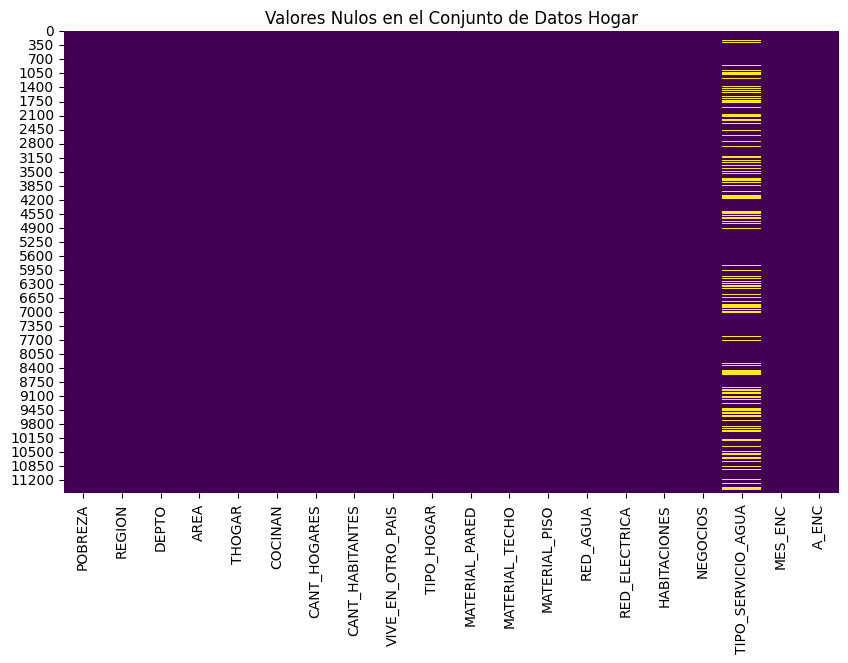

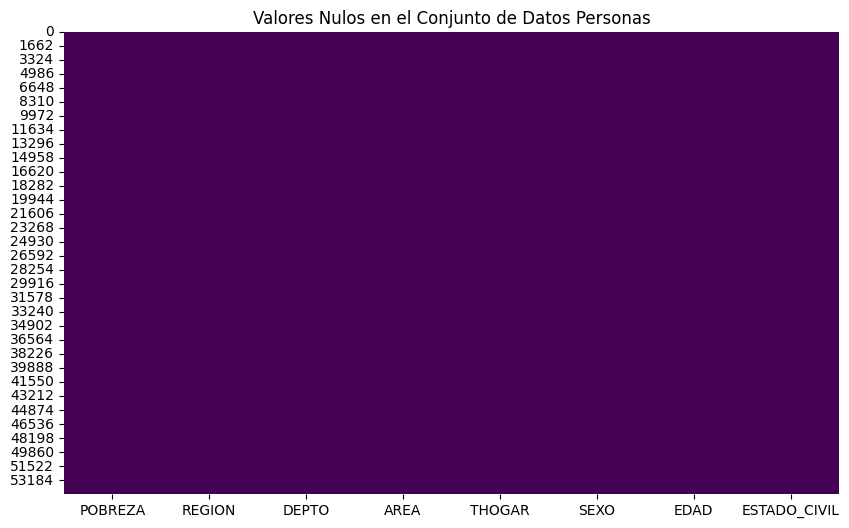

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor de valores nulos
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
sns.heatmap(df_H.isnull(), cbar=False, cmap='viridis')  # cmap define el esquema de color
plt.title('Valores Nulos en el Conjunto de Datos Hogar')
plt.show()

# Crear un mapa de calor de valores nulos
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
sns.heatmap(df_P.isnull(), cbar=False, cmap='viridis')  # cmap define el esquema de color
plt.title('Valores Nulos en el Conjunto de Datos Personas')
plt.show()


Podemos ver que aun tenemos algunos datos vacios en nuestro set de datos en la columna correspondiente al tipo de servicio de agua. Para normalizar los datos tomaremos como dat con el codigo 4, equivalente a inexistente.

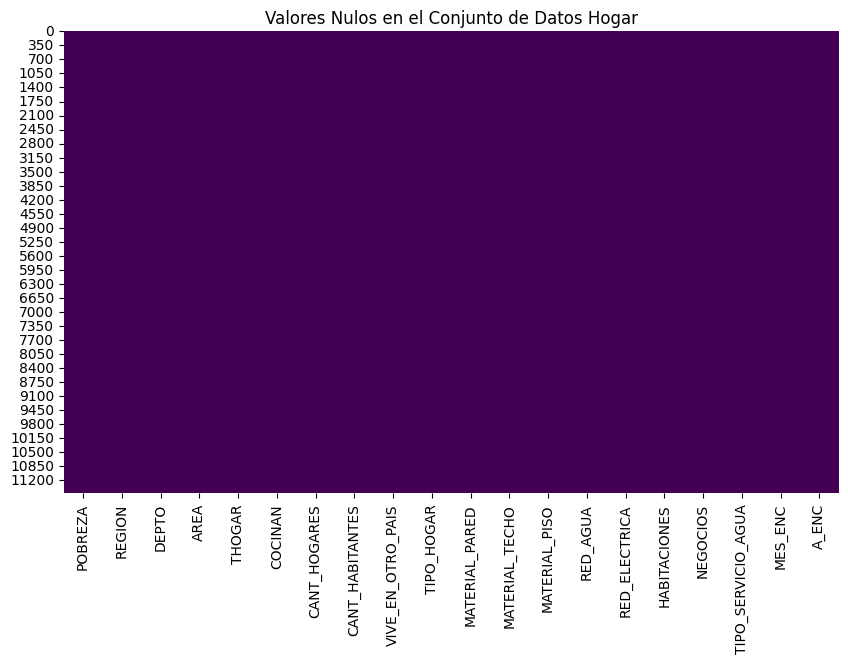

In [70]:
df_H['TIPO_SERVICIO_AGUA'].fillna(4, inplace=True)
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
sns.heatmap(df_H.isnull(), cbar=False, cmap='viridis')  # cmap define el esquema de color
plt.title('Valores Nulos en el Conjunto de Datos Hogar')
plt.show()

In [71]:
df_H.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11536 entries, 0 to 11535
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POBREZA             11536 non-null  float64
 1   REGION              11536 non-null  float64
 2   DEPTO               11536 non-null  float64
 3   AREA                11536 non-null  float64
 4   THOGAR              11536 non-null  float64
 5   COCINAN             11536 non-null  float64
 6   CANT_HOGARES        11536 non-null  float64
 7   CANT_HABITANTES     11536 non-null  float64
 8   VIVE_EN_OTRO_PAIS   11536 non-null  float64
 9   TIPO_HOGAR          11536 non-null  float64
 10  MATERIAL_PARED      11536 non-null  float64
 11  MATERIAL_TECHO      11536 non-null  float64
 12  MATERIAL_PISO       11536 non-null  float64
 13  RED_AGUA            11536 non-null  float64
 14  RED_ELECTRICA       11536 non-null  float64
 15  HABITACIONES        11536 non-null  float64
 16  NEGO

In [72]:
df_P.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54822 entries, 0 to 54821
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   POBREZA       54822 non-null  float64
 1   REGION        54822 non-null  float64
 2   DEPTO         54822 non-null  float64
 3   AREA          54822 non-null  float64
 4   THOGAR        54822 non-null  float64
 5   SEXO          54822 non-null  float64
 6   EDAD          54819 non-null  float64
 7   ESTADO_CIVIL  54817 non-null  float64
dtypes: float64(8)
memory usage: 3.3 MB


## Análisis Univariable

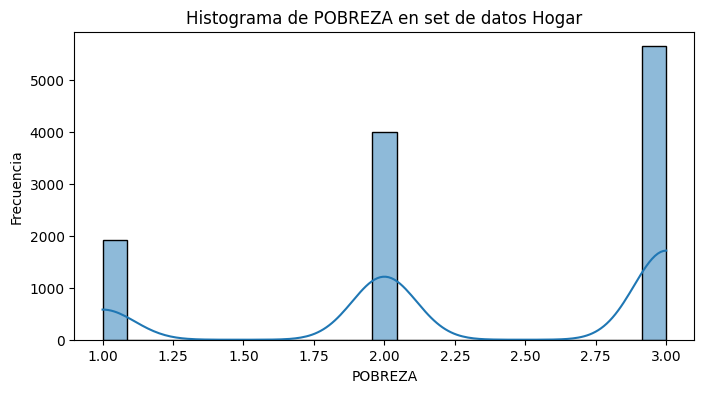

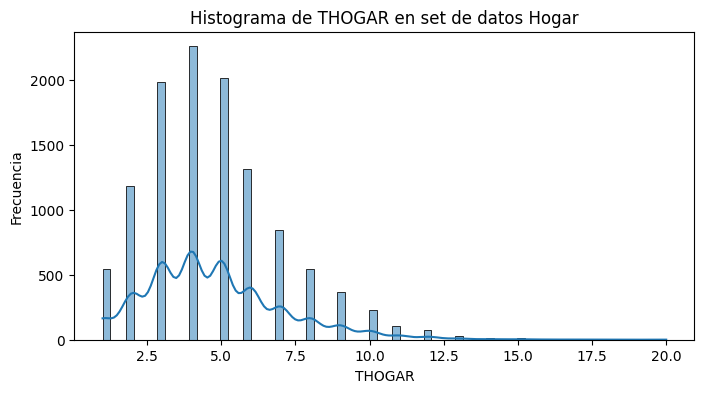

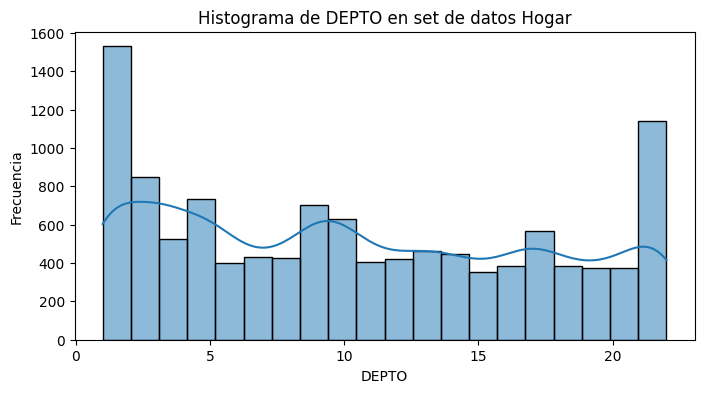

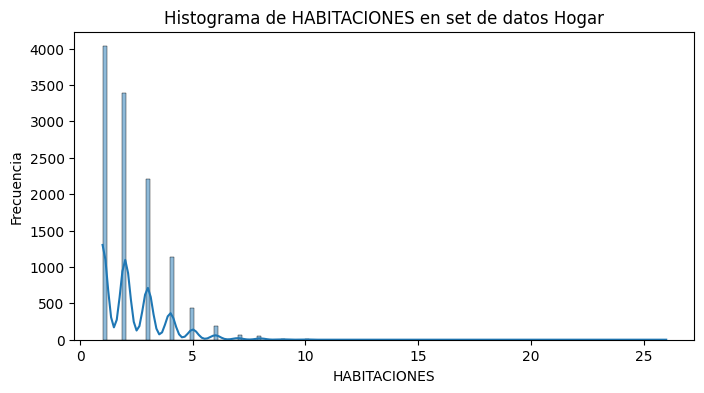

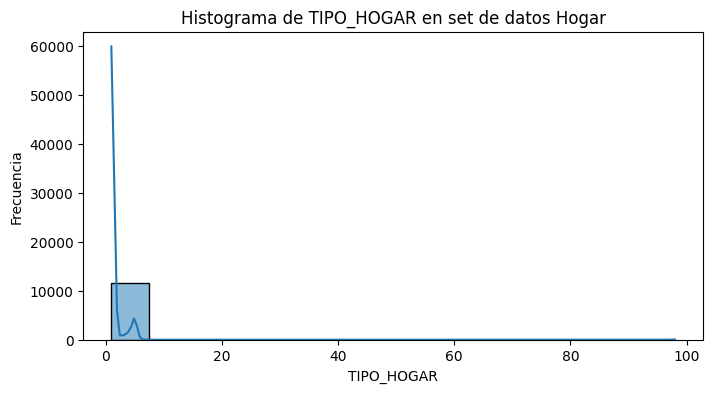

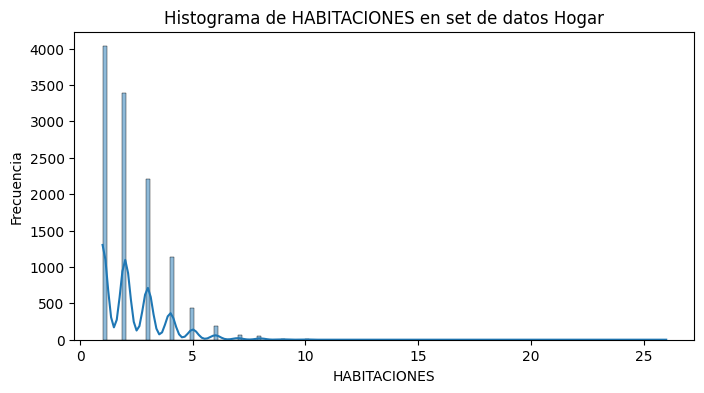

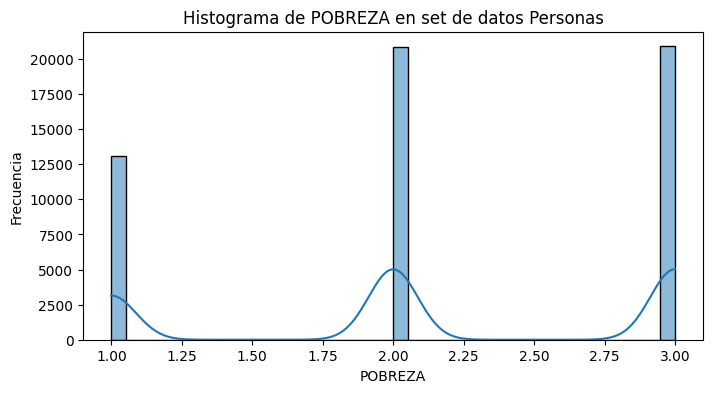

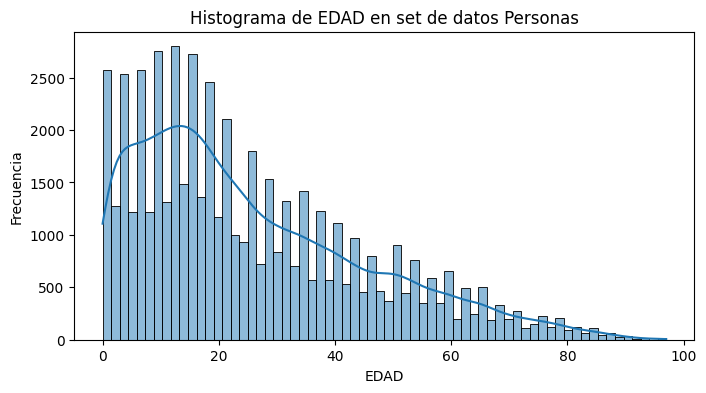

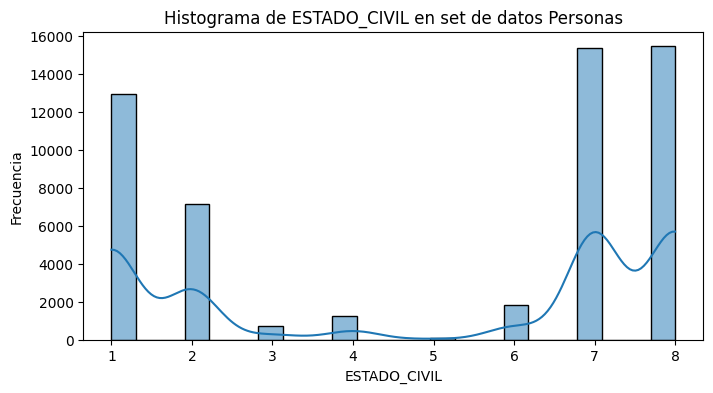

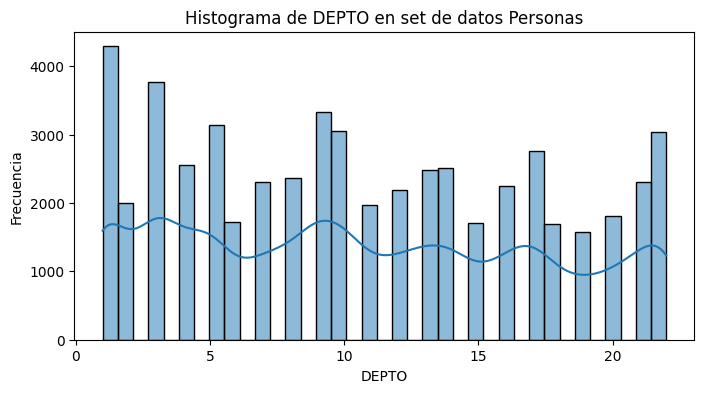

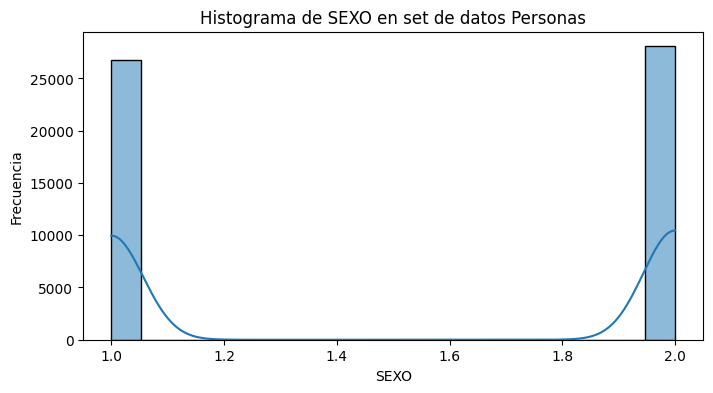

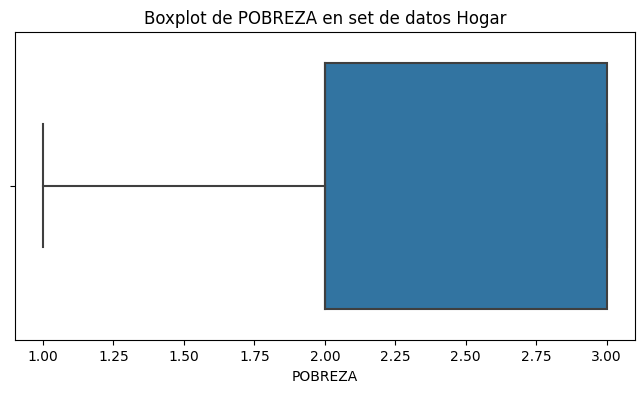

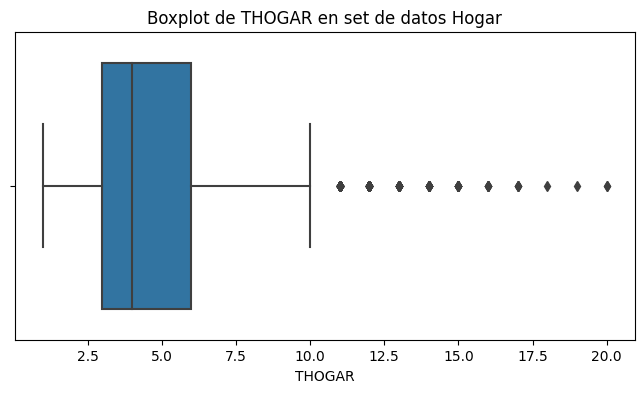

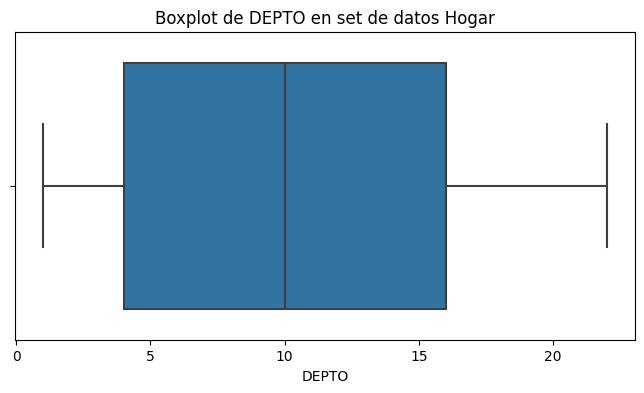

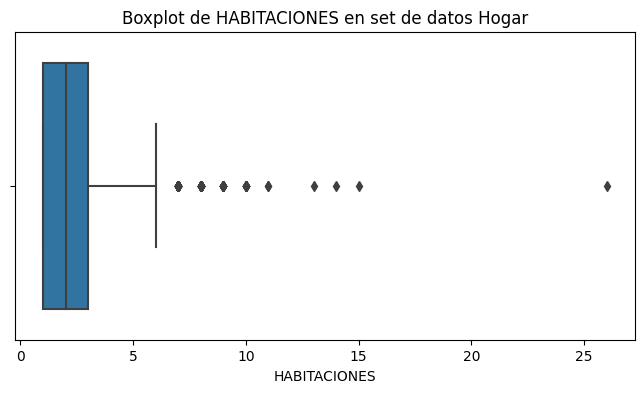

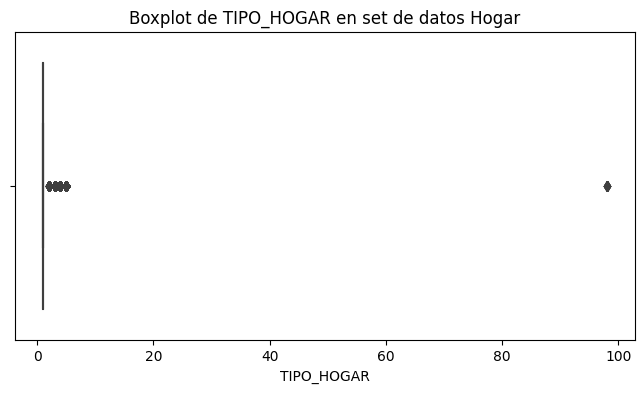

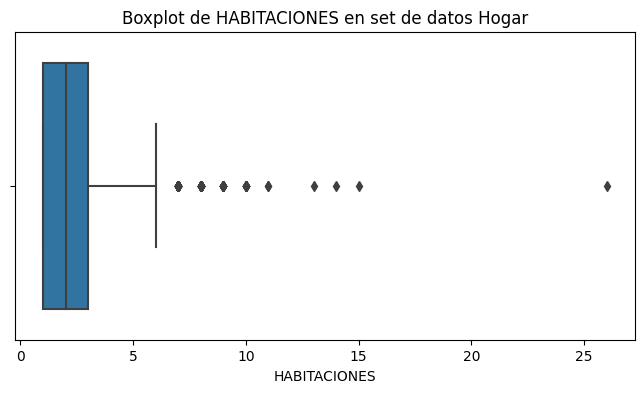

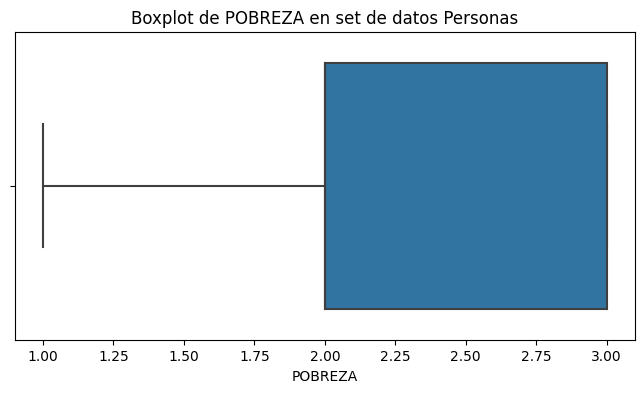

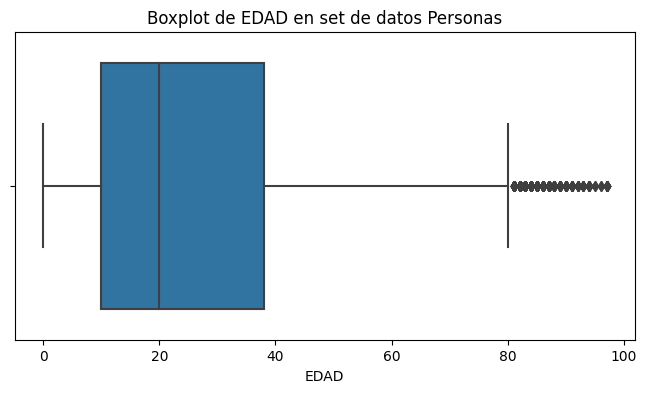

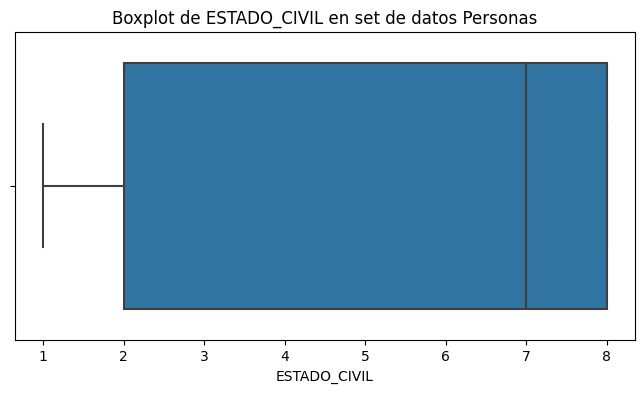

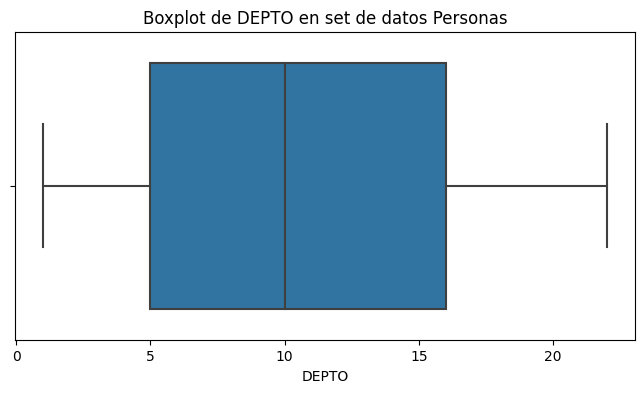

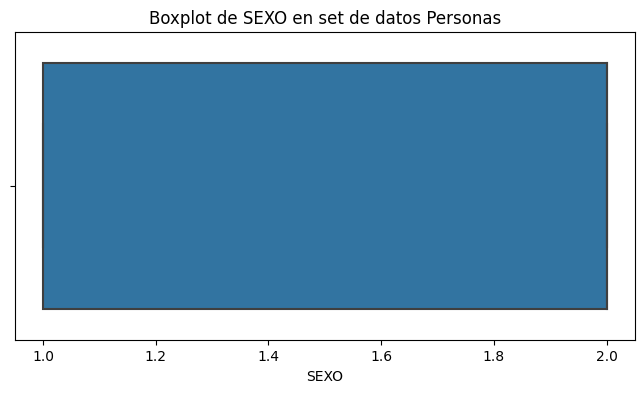

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas descriptivas para df_H
estadisticas_df_H = df_H.describe()

# Estadísticas descriptivas para df_P
estadisticas_df_P = df_P.describe()

# Variables importantes para df_H (modifica según tus necesidades)
variables_importantes_df_H = ['POBREZA', 'THOGAR', 'DEPTO', 'HABITACIONES', 'TIPO_HOGAR', 'HABITACIONES']

# Variables importantes para df_P (modifica según tus necesidades)
variables_importantes_df_P = ['POBREZA', 'EDAD', 'ESTADO_CIVIL', 'DEPTO', 'SEXO']

# Histogramas para df_H
for variable in variables_importantes_df_H:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_H[variable], kde=True)
    plt.title(f'Histograma de {variable} en set de datos Hogar')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()

# Histogramas para df_P
for variable in variables_importantes_df_P:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_P[variable], kde=True)
    plt.title(f'Histograma de {variable} en set de datos Personas')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()

# Boxplots para df_H
for variable in variables_importantes_df_H:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_H[variable])
    plt.title(f'Boxplot de {variable} en set de datos Hogar')
    plt.xlabel(variable)
    plt.show()

# Boxplots para df_P
for variable in variables_importantes_df_P:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_P[variable])
    plt.title(f'Boxplot de {variable} en set de datos Personas')
    plt.xlabel(variable)
    plt.show()


## Análisis Bivariable

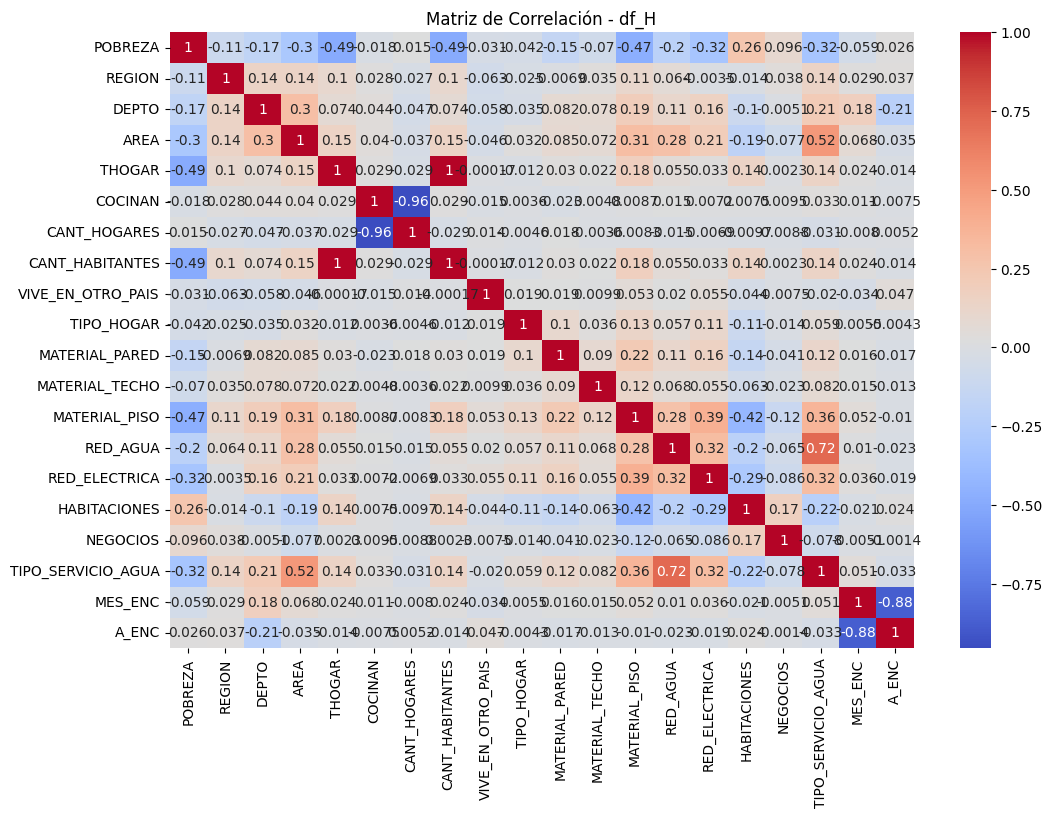

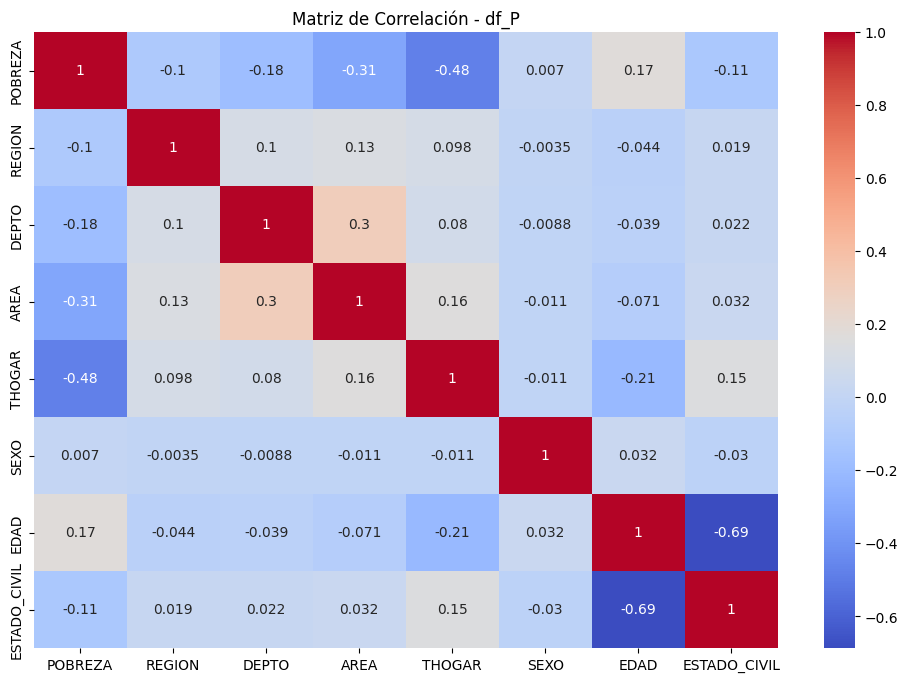

In [77]:
correlation_matrix_H = df_H.corr()
correlation_matrix_P = df_P.corr()

# Visualizar la matriz de correlación para df_H
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_H, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - df_H')
plt.show()

# Visualizar la matriz de correlación para df_P
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_P, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - df_P')
plt.show()


Análisis de df_H


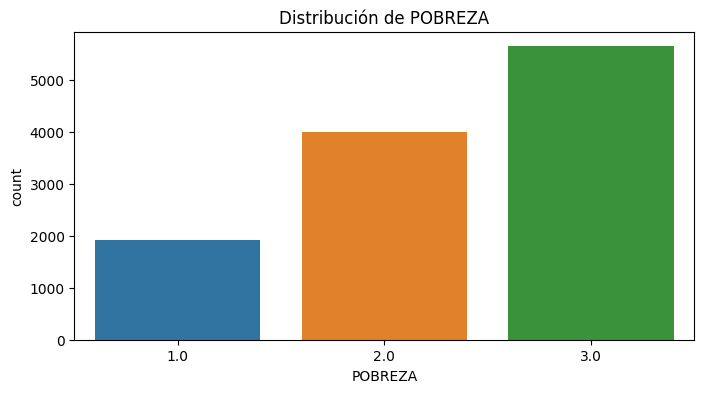

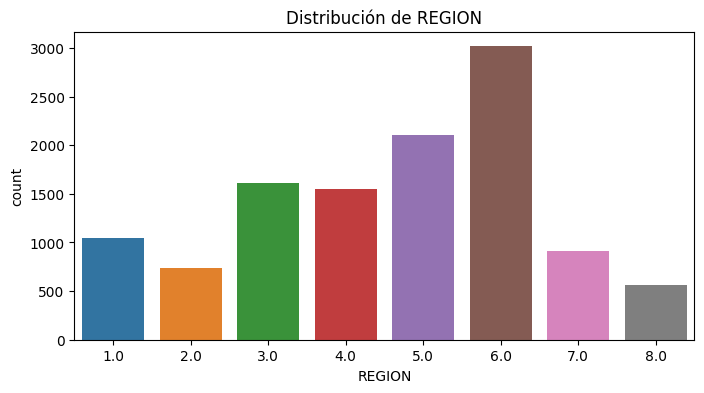

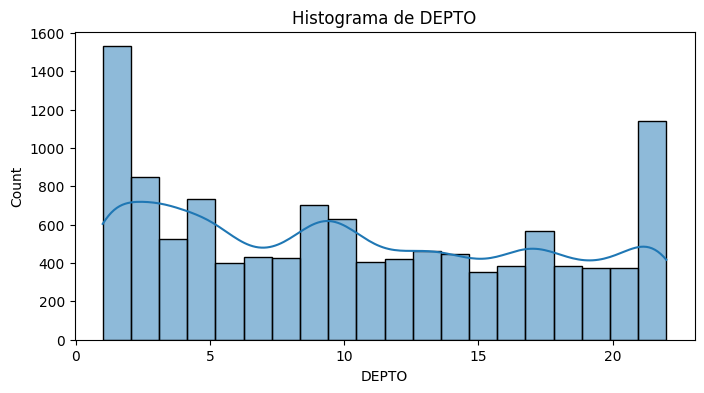

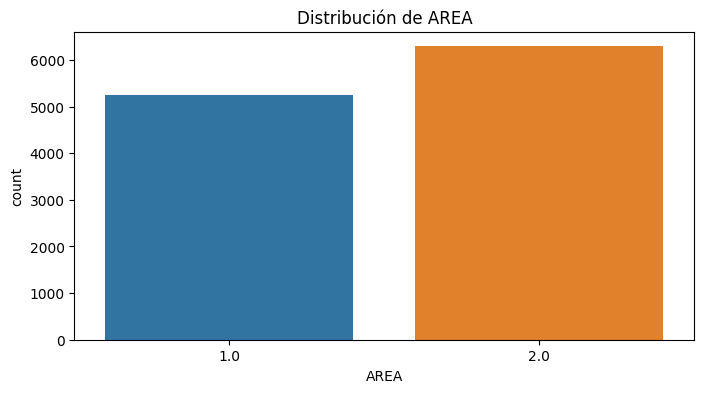

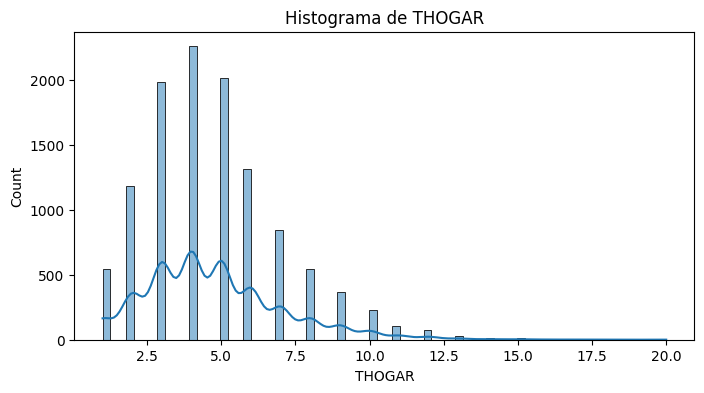

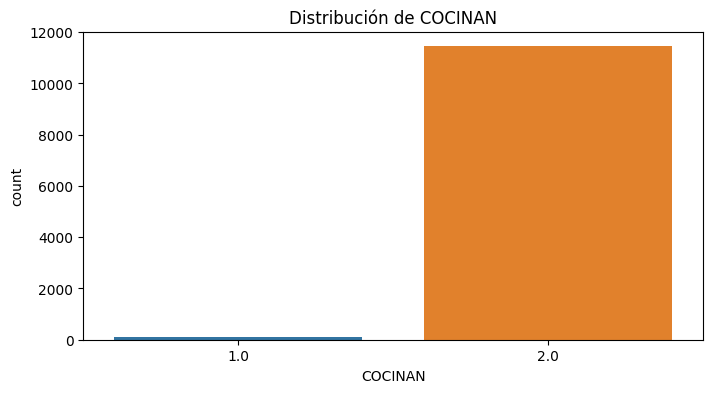

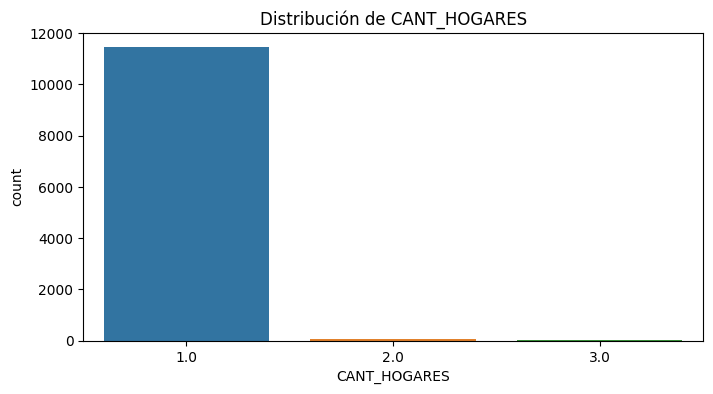

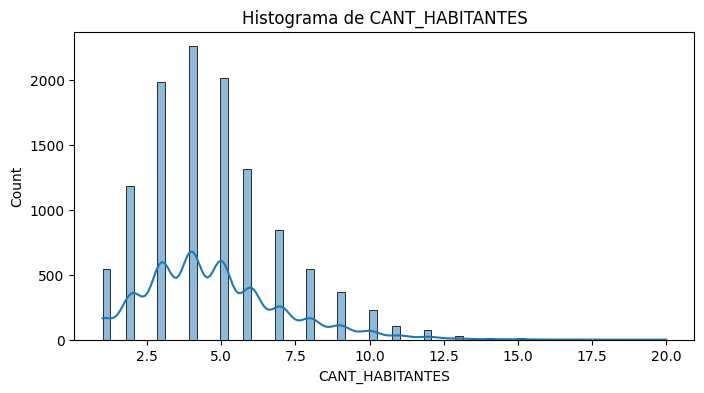

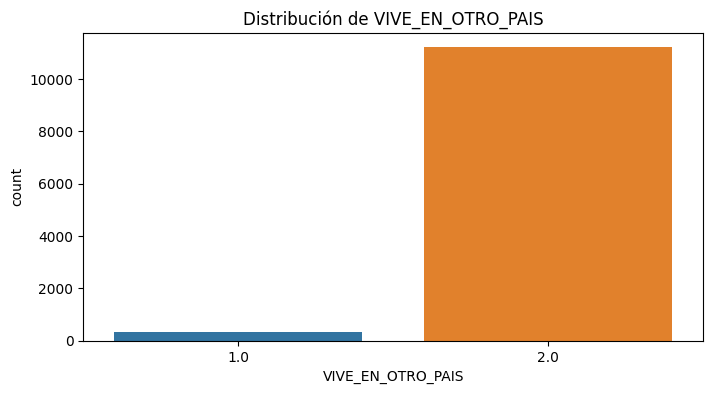

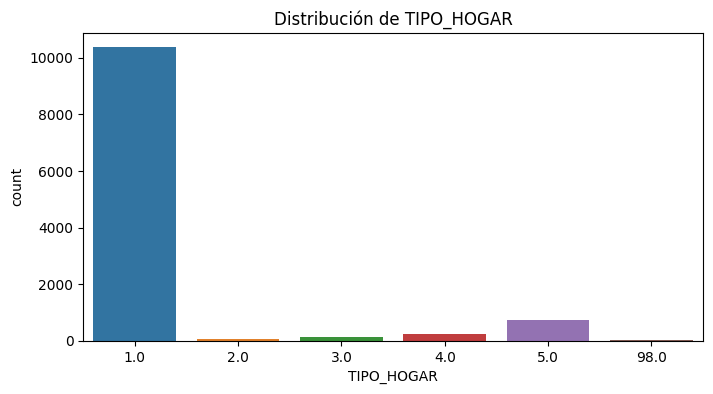

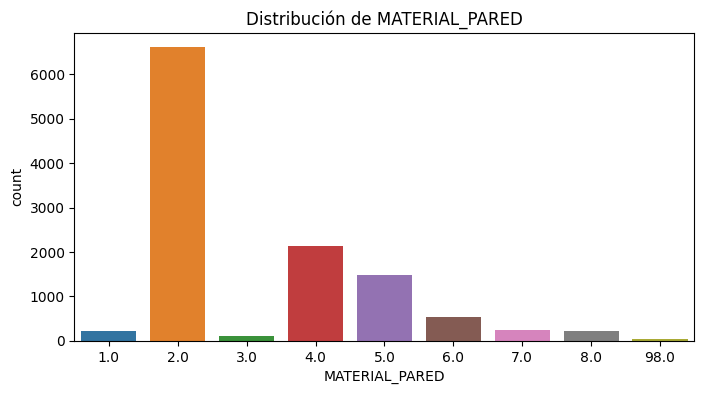

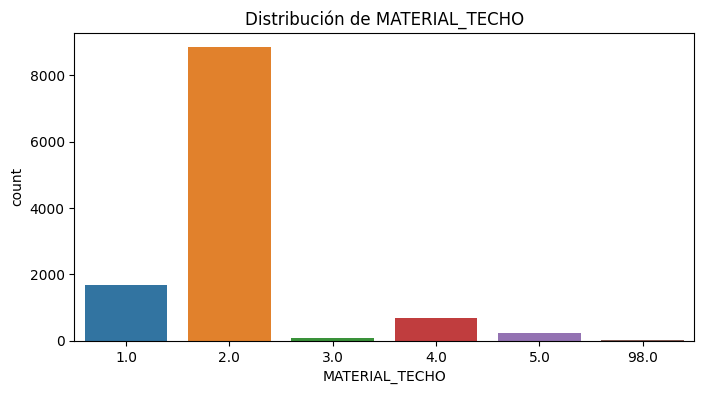

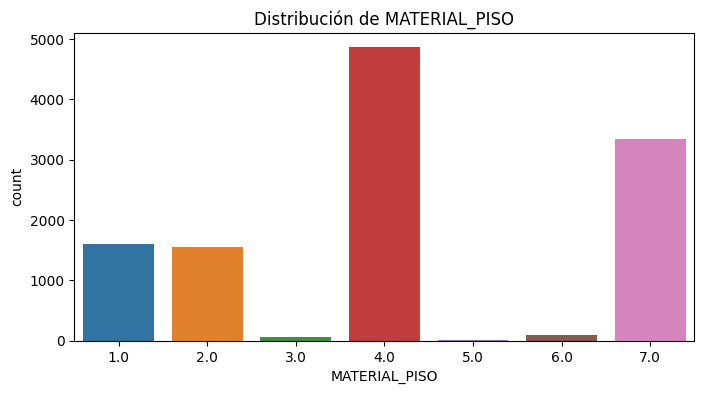

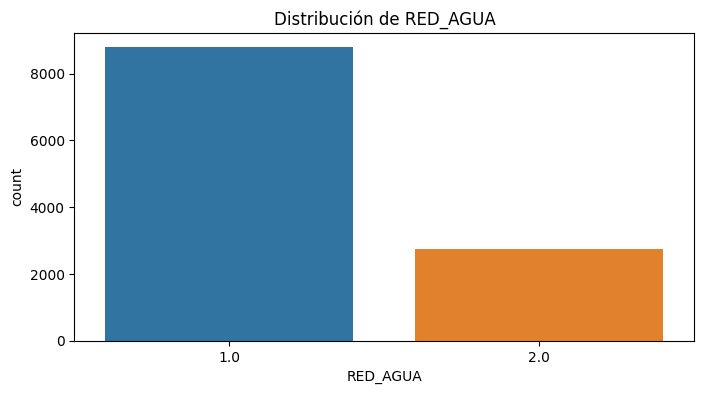

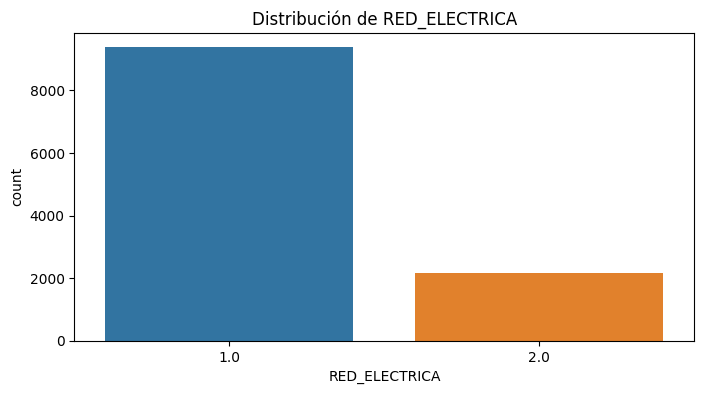

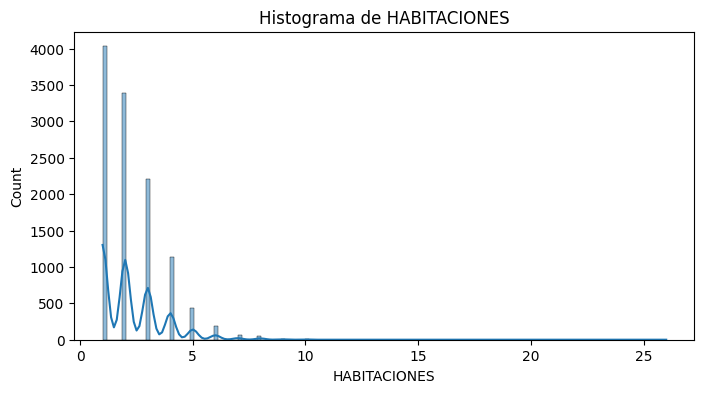

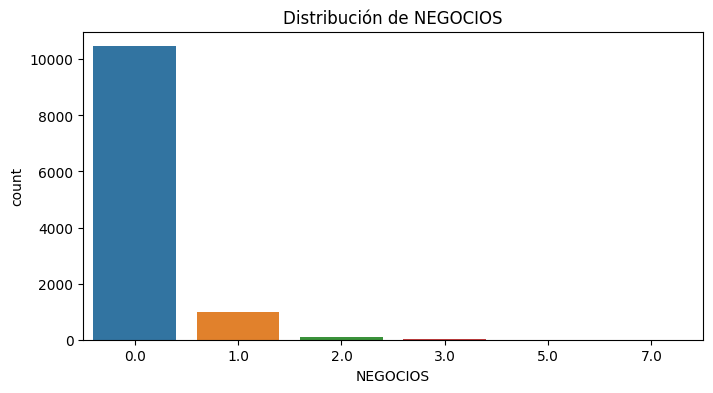

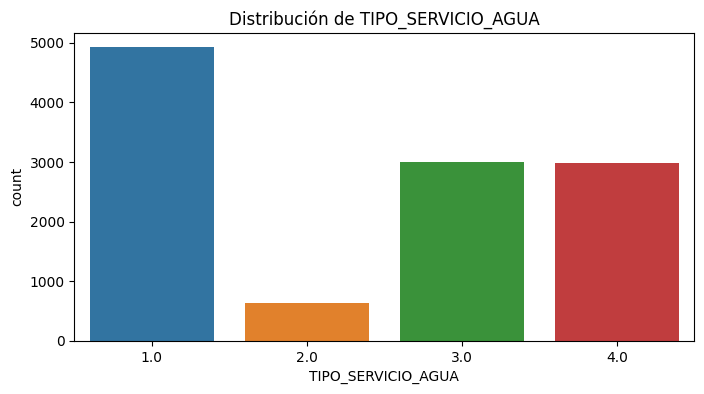

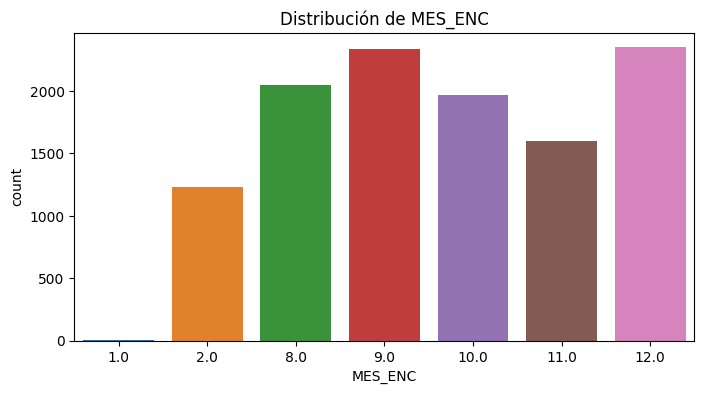

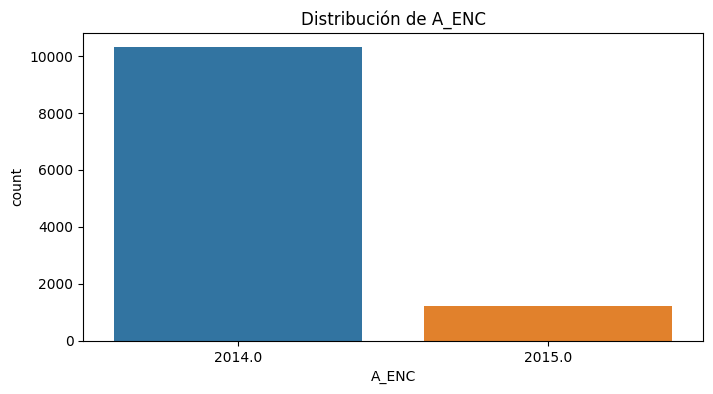

Análisis de df_P


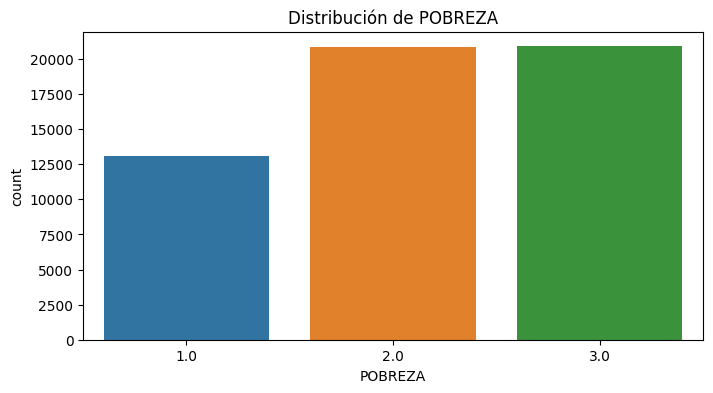

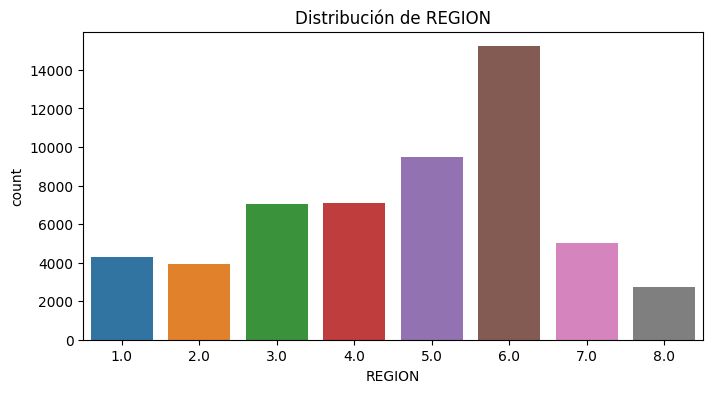

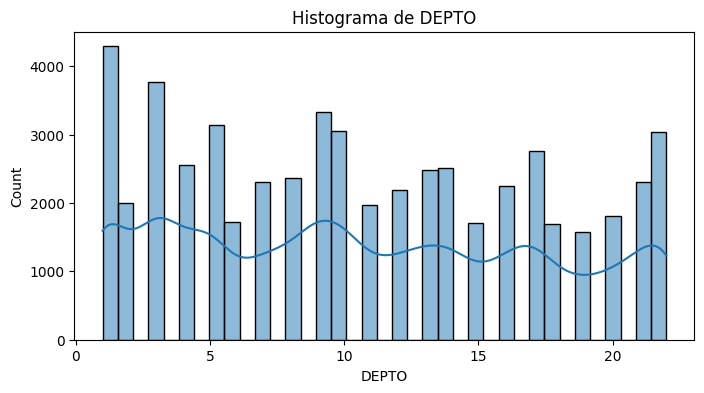

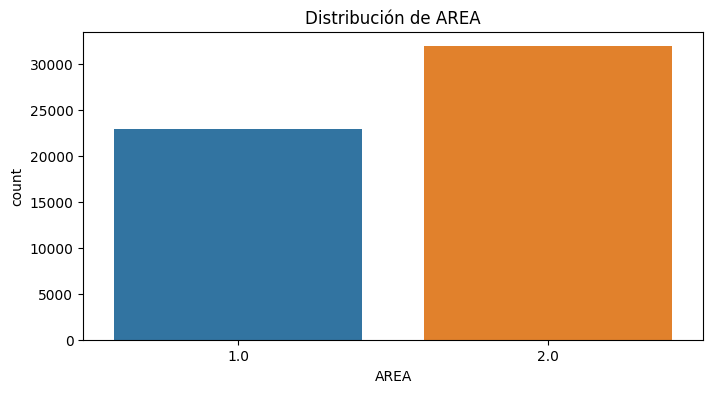

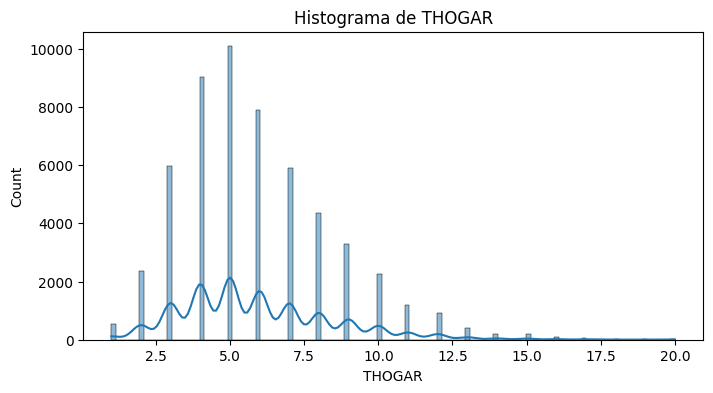

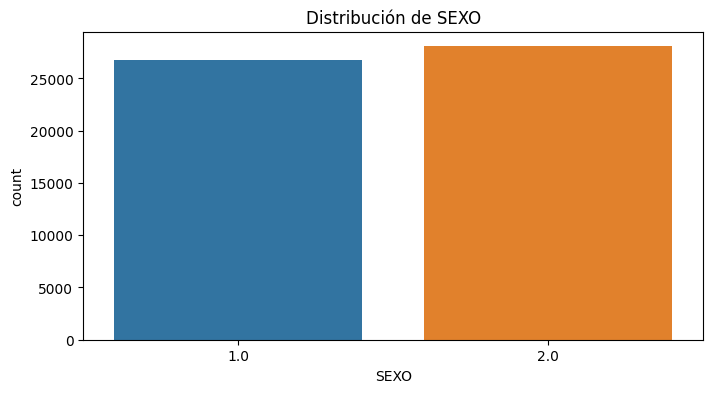

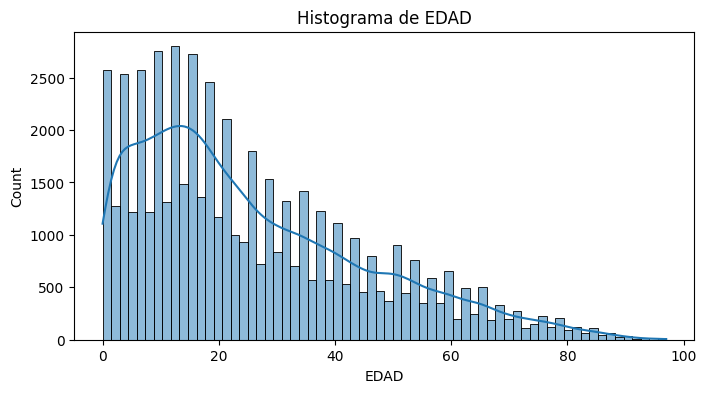

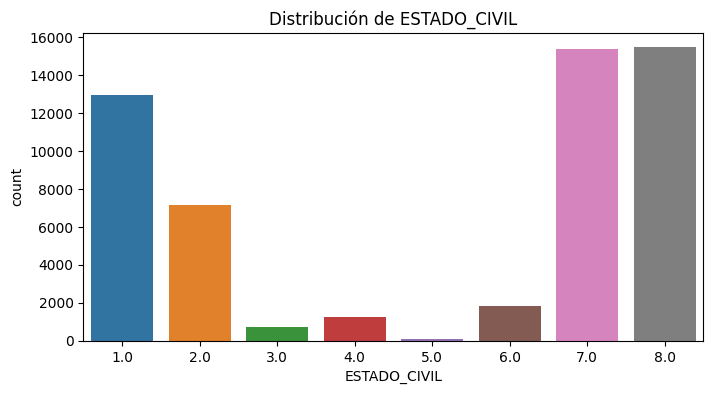

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# DataFrames df_H y df_P
dataframes = [df_H, df_P]
dataframe_names = ['df_H', 'df_P']

# Iterar a través de los DataFrames
for i, df in enumerate(dataframes):
    print(f"Análisis de {dataframe_names[i]}")
    for column in df.columns:
        plt.figure(figsize=(8, 4))
        
        # Verificar si la columna es numérica para seleccionar el tipo de gráfico
        if df[column].dtype in ['float64', 'int64']:
            if len(df[column].unique()) <= 10:
                # Para variables categóricas con menos de 10 valores únicos, crear un gráfico de barras
                sns.countplot(data=df, x=column)
                plt.title(f'Distribución de {column}')
            else:
                # Para variables numéricas, crear un histograma
                sns.histplot(data=df, x=column, kde=True)
                plt.title(f'Histograma de {column}')
        else:
            # Para variables no numéricas, crear un gráfico de barras
            sns.countplot(data=df, x=column)
            plt.title(f'Distribución de {column}')
            plt.xticks(rotation=45)
        
        plt.show()
